In [1]:
import keras.datasets.mnist

import tensorflow

tensorflow.__version__

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.9.2'

In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape,Flatten, Dropout
from keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D

from keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

In [3]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
#BatchNormalization
generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

generator.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        204864    
                                                                 
 batch_normalization_1

2022-08-12 21:17:47.453822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-12 21:17:47.453912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, input_shape=(28,28,1), padding='same', strides=2, activation=LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(0.2)))
discriminator.add(Dropout(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 0
Non-trainabl

In [5]:
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [6]:
models = Sequential()
models.add(Dense(10, activation='relu', input_dim=100))
models.add(Dense(100, activation='relu'))
models.add(Dense(1, activation='sigmoid'))

In [7]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 100)               1100      
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________


In [8]:
inputs = Input(shape=(100,))
outputs = models(inputs)
inputs

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'input_2')>

In [9]:
models = Model(inputs, outputs)
models.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 1)                 2211      
                                                                 
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________


In [10]:
inputs = Input(shape=(10,))

In [11]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가

#output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가
output = Dense(1, activation='sigmoid')
output = output(hidden2) # <- 새로 추가

In [12]:
model = Model(inputs, output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                704       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [13]:
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

In [14]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [15]:
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
def gan_train(epochs, batch_size, saving_interval) :
    (x_train, x_test), (y_train, y_test) = keras.datasets.mnist.load_data()
    x_train =x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')

    x_train = (x_train - 127.5) / 127.5
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size,1))

    for i in range(epochs):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        g_loss = gan.train_on_batch(noise, true)

        print(f"epochs :{epochs}, d_loss : {round(d_loss,4)}, g_loss : {round(g_loss,4)}")


        if i % saving_interval == 0:
            noise = np.random.normal(0,1,(25,100))
            gen_imgs = generator.predict(noise)

            gen_imgs = 0.5 * gen_imgs + 0.5

            fig, axs = plt.subplots(5,5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                    axs[j, k].axis('off')
                    count+=1

                    fig.savefig('../gan_images/gan_mnist_%d.png'%i)

In [17]:
np.random.normal(0, 1, (32, 100))

array([[ 0.53001167,  0.61371384,  0.46117715, ...,  1.01434104,
         0.73784254,  0.07412681],
       [ 0.53709921,  0.11180071, -0.63650551, ..., -2.06456216,
        -0.07914657, -0.82711751],
       [-0.43791666,  0.21314916, -0.06167263, ...,  0.56534967,
        -0.47812934,  1.7123867 ],
       ...,
       [ 1.26241182,  0.52792309,  0.41533709, ..., -1.03096714,
        -0.21072392, -1.14009331],
       [ 0.96167668,  1.41735091, -1.04392584, ..., -0.19727419,
        -0.32333259, -2.4460133 ],
       [-0.2624766 ,  0.7335057 , -0.54473978, ..., -1.40485145,
         0.58892833, -0.77266446]])

1/1 [==============================] - 0s 70ms/step


2022-08-12 21:17:48.063190: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-12 21:17:48.063323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-12 21:17:48.222218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-12 21:17:48.450095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


epochs :4001, d_loss : 0.6895, g_loss : 0.5037
1/1 [==============================] - 0s 54ms/step


2022-08-12 21:17:48.675959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step
epochs :4001, d_loss : 0.5001, g_loss : 0.1982
1/1 [==============================] - 0s 13ms/step
epochs :4001, d_loss : 0.4914, g_loss : 0.0608
1/1 [==============================] - 0s 12ms/step
epochs :4001, d_loss : 0.5167, g_loss : 0.0449
1/1 [==============================] - 0s 12ms/step
epochs :4001, d_loss : 0.5016, g_loss : 0.0868
1/1 [==============================] - 0s 11ms/step
epochs :4001, d_loss : 0.4597, g_loss : 0.2346
1/1 [==============================] - 0s 12ms/step
epochs :4001, d_loss : 0.4459, g_loss : 0.4145
1/1 [==============================] - 0s 12ms/step
epochs :4001, d_loss : 0.4512, g_loss : 0.502
1/1 [==============================] - 0s 12ms/step
epochs :4001, d_loss : 0.4617, g_loss : 0.4801
1/1 [==============================] - 0s 14ms/step
epochs :4001, d_loss : 0.4439, g_loss : 0.4327
1/1 [==============================] - 0s 11ms/step
epochs :4001, d_loss : 0.4336, g_loss : 0.4161
1/1 [======

/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_8105/1544467449.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(5,5)


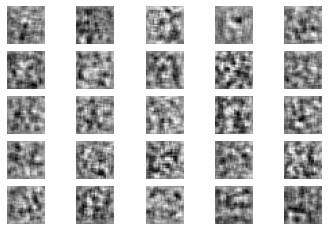

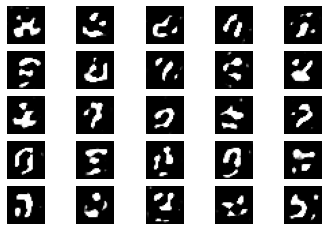

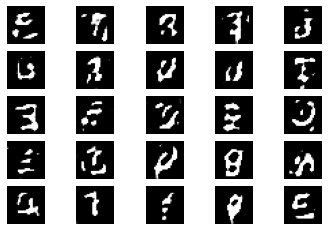

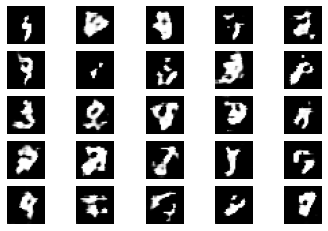

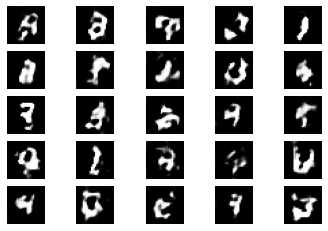

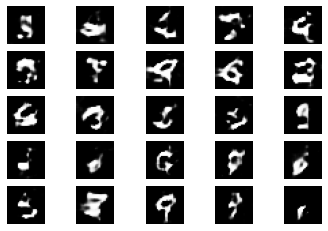

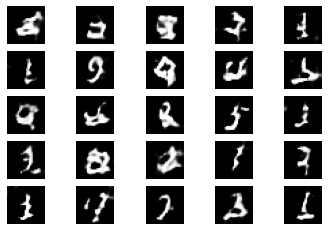

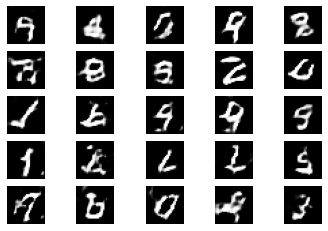

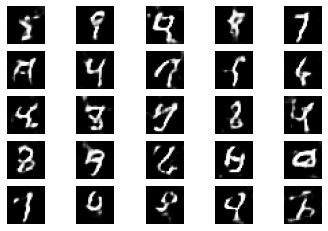

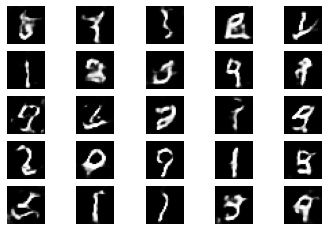

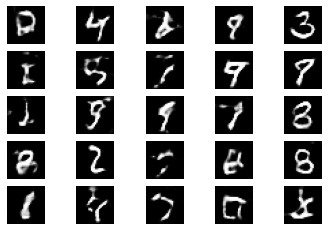

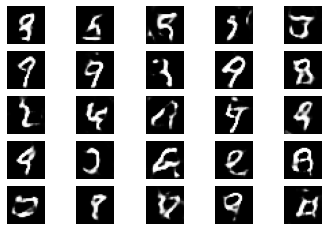

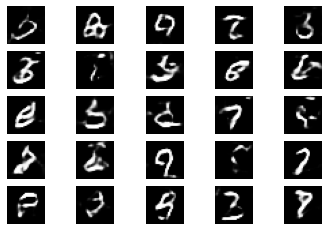

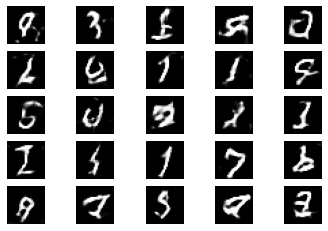

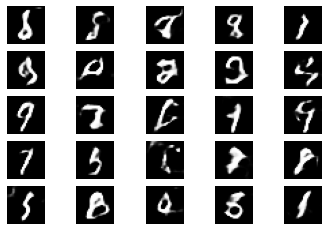

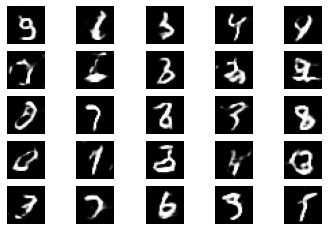

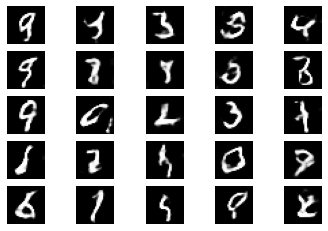

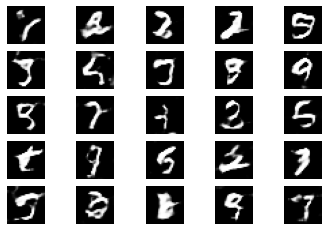

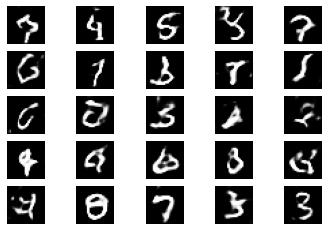

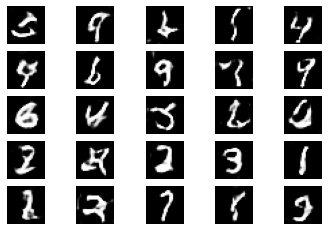

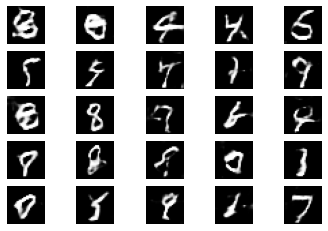

In [18]:
gan_train(4001, 32, 200)